<!--NAVIGATION-->
< [更多资源](03.13-Further-Resources.ipynb) | [目录](Index.ipynb) | [简单的折线图](04.01-Simple-Line-Plots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Visualization with Matplotlib

# 使用Matplotlib進行可視化

> One of Matplotlib’s most important features is its ability to play well with many operating systems and graphics backends.
Matplotlib supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you wish.
This cross-platform, everything-to-everyone approach has been one of the great strengths of Matplotlib.
It has led to a large user base, which in turn has led to an active developer base and Matplotlib’s powerful tools and ubiquity within the scientific Python world.

Matplotlib最重要的特性之一就是它的對很多操作系統以及後端圖形引擎的廣泛支持。 Matplotlib能在大量的圖形引擎上工作並輸出多種不同的格式，這意味著你可以認為無論使用哪種操作系統輸出哪種格式，它都能良好工作。這種特性為Matplotlib帶來了大量的用戶基礎，從而也吸引了活躍的開發者社區，使其發展稱為在整個科學Python社區中無處不在的強大繪圖工具。

> In recent years, however, the interface and style of Matplotlib have begun to show their age.
Newer tools like ggplot and ggvis in the R language, along with web visualization toolkits based on D3js and HTML5 canvas, often make Matplotlib feel clunky and old-fashioned.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, Seaborn (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and even Pandas itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

然而最近幾年，Matplotlib顯得有點過時了。 R語言中的ggplot和ggvis這些新工具廣泛應用了類似D3js和HTML5畫布這樣的Web技術，讓Matplotlib顯得相形見絀。近來的Matplotlib版本將設置新的圖表風格變得相對簡單了一些（參見[自定義matplotlib：配置和样式單](04.11-Settings-and-Stylesheets.ipynb)），而且開發者在Matplotlib基礎上開發了很多新的包，使得可視化過程能夠通過更清晰和現代的API來實現，例如Seaborn（參見[使用Seaborn進行可視化](04.14-Visualization-With-Seaborn.ipynb)）、[ggpy](http://yhat.github.io/ggpy/)、[HoloViews](http://holoviews.org/)和[Altair](http://altair-viz.github.io/)，而且Pandas本身也提供了對Matplotlib的API封裝。但是即使使用封裝後的API，深入研究Matplotlib的語法對於更精細的調整圖表的輸出也是非常有幫助的。正因為如此，作者深信Matplotlib仍然會在數據可視化技術棧中佔有不可或缺的地位，即使近期，社區已經逐步不再直接調用Matplotlib的API的情況下。

### Importing Matplotlib  載入Matplotlib

> Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

NumPy的載入使用慣例別名`np`，Pandas的載入使用慣例別名`pd`，下面是載入Matplotlib的慣例別名，`plt`是我們最常用的模塊，本章中我們會一直看到它。

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### Setting Styles 設置風格

> We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

使用`plt.style`屬性用來給我們的圖表設置視覺的風格。下面我們設置使用`classic`風格，這讓我們之後的圖表都會保持使用經典Matplotlib風格：

In [2]:
plt.style.use('classic')

### ``show()`` or No ``show()``? How to Display Your Plots

### `show()` 或是不要 `show()` ？如何顯示你的圖表

> A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

一張你看不到的圖表不會有什麼用處，但是顯示圖表的方法根據使用環境會有所不同。 Matplotlib的最佳實踐取決於你在什麼環境中使用它；通常有三種應用場景，在腳本文件中使用，在IPython終端中使用以及在IPython notebook中使用。

#### 1.Plotting from a script 在腳本文件中作圖

> If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

如果你是在腳本文件中使用Matplotlib，`plt.show()`是你顯示圖表的函數。 `plt.show()`會啟動一個事件循環，找到所有激活的圖表對象，然後打開一個或多個交互的窗口來顯示你的圖表。

> One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

還要提醒一下：`plt.show()`函數在每個Python會話中*僅能使用一次*，最常見的情況就是在腳本的末尾使用它。多次調用`show()`函數會導致不可預料的結果，應該避免。

#### 2.Plotting from an IPython shell 在IPython終端中作圖

> It can be very convenient to use Matplotlib interactively within an IPython shell (see [IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)).
IPython is built to work well with Matplotlib if you specify Matplotlib mode.
To enable this mode, you can use the ``%matplotlib`` magic command after starting ``ipython``:

在IPython終端（參見[IPython：超越Python解釋器](01.00-IPython-Beyond-Normal-Python.ipynb)）中交互式使用Matplotlib是非常方便的。 IPython內建有支持Matplotlib的模式。要激活這個模式，你只需要在IPython終端輸入`%matplotlib`魔術指令即可：

> At this point, any ``plt`` plot command will cause a figure window to open, and further commands can be run to update the plot.
Some changes (such as modifying properties of lines that are already drawn) will not draw automatically: to force an update, use ``plt.draw()``.
Using ``plt.show()`` in Matplotlib mode is not required.

這之後任何`plt`的作圖命令都會打開一個窗口包含作出的圖表，後續運行的命令還能更新圖表。某些改變（例如修改已經畫好的線條的屬性）不會自動更新，這時可以使用`plt.draw()`來強制更新窗口。在Matplotlib模式下是不需要使用`plt.show()`的。

#### 3.Plotting from an IPython notebook 在IPython notebook中作圖

> Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

在IPython notebook中交互式的作圖也可以使用`%matplotlib`魔術指令，其工作方式類似於在IPython終端中一樣。而且在IPython notebook中，你還可以通過指定該魔術指令的參數讓作出的圖直接在內聯在notebook中顯示。兩個參數可以指定不同的作圖模式：

- `%matplotlib notebook`：在notebook中作出具有交互控制功能的內聯圖表
- `%matplotlib inline`： 在notebook中作出*靜態*內聯圖表

> After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

運行了這條魔術指令後（只需要在每個jupyter內核中運行一次即可），後續notebook中任何創建圖表的代碼都會輸出一個內嵌的PNG圖像，作出圖表：

In [3]:
%matplotlib inline

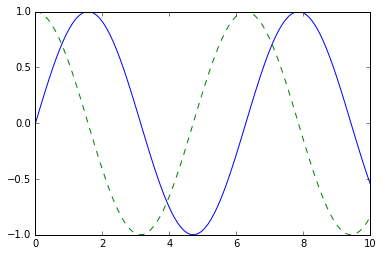

In [4]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Saving Figures to File

### 將圖表保存到文件

> One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:
To confirm that it contains what we think it contains:

Matplotlib還有一個非常棒的功能，那就是將圖表保存成很多種不同的文件格式。保存圖表可以通過`savefig()`函數實現。例如，如果我們需要將上面的圖表保存成一個PNG文件，只需要執行下面的代碼：可以使用IPython的`Image`對象將這個圖像文件顯示出來，驗證一下保存的文件是否和圖表一致：

In [5]:
fig.savefig('output/my_figure.png')

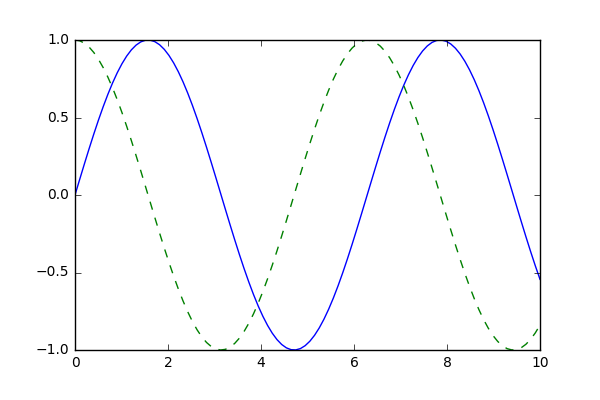

In [6]:
from IPython.display import Image
Image('output/my_figure.png')

## Two Interfaces for the Price of One

## 兩套不同接口

> A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

Matplotlib一個很令人迷惑的地方是它具有兩套接口：一套是很方便的MATLAB風格的接口，還有一套是更強大的面向對象的接口。我們在這裡簡單的介紹一下它們的區別。

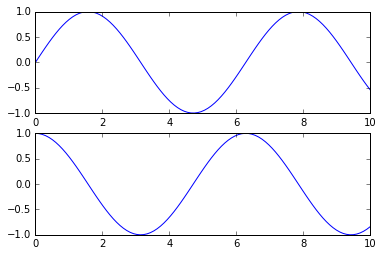

In [7]:
# MATLAB-style Interface

 # 創建圖表
plt.figure() 

# 創建上面第一行的子圖表，並設置x，y軸的數據
plt.subplot(2, 1, 1) # (行、列、子圖表序號)
plt.plot(x, np.sin(x))

# 創建下面第二行的子圖表，並設置x，y軸的數據
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

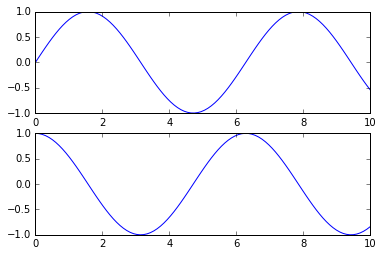

In [8]:
# Object-oriented interface¶

# 首先創建兩個子圖表
# 返回值fig是兩個子Figure對象，ax是兩個子Axes對象
fig, ax = plt.subplots(2)

# 在兩個不同的Axes對像上調用plot方法分別作圖
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

> For more simple plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

對於簡單的圖表來說，採用哪種風格的接口作圖取決於個人喜好，但是對於復雜的圖表來說，面向對象接口是必須的。在本章中，我們會在兩者之間進行切換，依據哪樣方式更加方便來決定。在大多數情況下，`plt.plot()`切換到`ax.plot()`之間的區別會很小，但是裡面會有些坑，我們會在後續小節中著重指出。

# Simple Line Plots

# 簡單的折線圖

> Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.
Here we will take a first look at creating a simple plot of this type.
As with all the following sections, we'll start by setting up the notebook for plotting and  importing the packages we will use:

對於圖表來說，最簡單的莫過於作出一個單一函數$y=f(x)$的圖像。本節中我們首先來介紹創建這種類型圖表。本節和後續小節中，我們都會使用下面的代碼將我們需要的包載入到notebook中：

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

> For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

對於所有的Matplotlib圖表來說，我們都需要從創建圖形和維度開始。圖形和維度可以使用下面代碼進行最簡形式的創建：

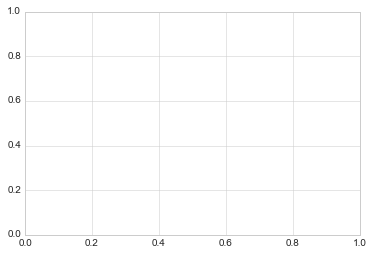

In [10]:
fig = plt.figure()
ax = plt.axes()

> In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

在Matplotlib中，*圖形*（類`plt.Figure`的一個實例）可以被認為是一個包括所有維度、圖像、文本和標籤對象的容器。 *維度*（類`plt.Axes`的一個實例）就是你上面看到的圖像，一個有邊界的格子包括刻度和標籤，最終還有我們畫在上面的圖表元素。我們會使用變量名`fig`來指代圖形對象，以及變量名`ax`來指代維度變量。一旦我們創建了維度，我們可以使用`ax.plot`方法將數據繪製在圖表上。下面是一個簡單的正弦函數圖形：

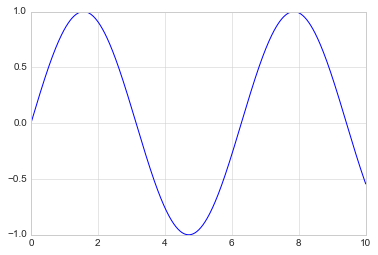

In [11]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

> Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two interfaces):

同樣的，我們可以使用pylab接口（MATLAB風格的接口）幫我們在後台自動創建這兩個對象：

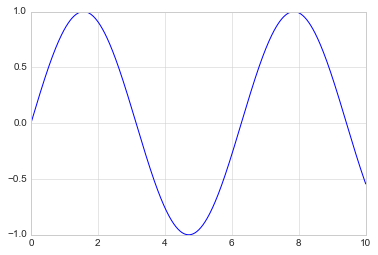

In [12]:
plt.plot(x, np.sin(x));

> If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

如果我們需要在同一幅圖形中繪製多根線條，只需要多次調用`plot`函數即可：

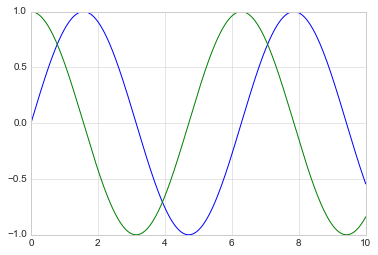

In [13]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

## Adjusting the Plot: Line Colors and Styles

## 調整折線圖：線條顏色和風格

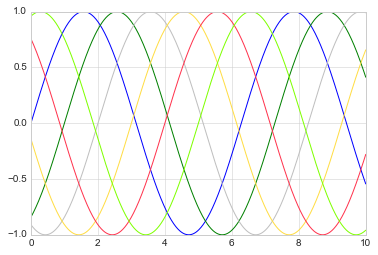

In [14]:
plt.plot(x, np.sin(x - 0), color='blue')        # 通過顏色名稱指定
plt.plot(x, np.sin(x - 1), color='g')           # 通過顏色簡寫名稱指定(rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # 介於0-1之間的灰階值
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # 16進制的RRGGBB值
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB元組的顏色值，每個值介於0-1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # 能支持所有HTML顏色名稱值

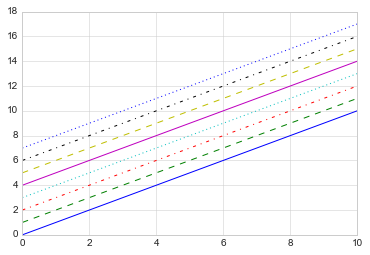

In [15]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# 還可以用形象的符號代表線條風格
plt.plot(x, x + 4, linestyle='-')  # 實線
plt.plot(x, x + 5, linestyle='--') # 虛線
plt.plot(x, x + 6, linestyle='-.') # 長短點虛線
plt.plot(x, x + 7, linestyle=':');  # 點線

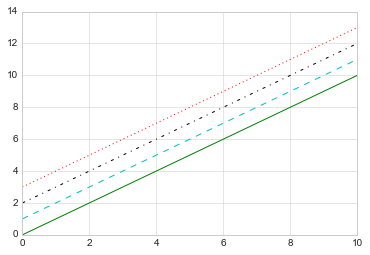

In [16]:
plt.plot(x, x + 0, '-g')  # 綠色實線
plt.plot(x, x + 1, '--c') # 天青色虛線
plt.plot(x, x + 2, '-.k') # 黑色長短點虛線
plt.plot(x, x + 3, ':r');  # 紅色點線

## Adjusting the Plot: Axes Limits

## 調整折線圖：坐標軸範圍

> Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

Matplotlib會自動選擇非常合適的坐標軸範圍來繪製你的圖像，但是有些情況下你也需要自己進行相關調整。使用`plt.xlim()`和`plt.ylim()`函數可以調整坐標軸的範圍：

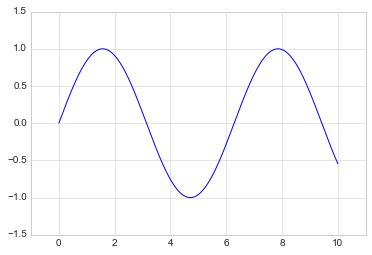

In [17]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

> If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

如果某些情況下你希望將坐標軸反向，你可以通過上面的函數實現，將參數順序顛倒即可：

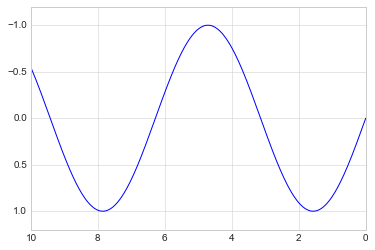

In [18]:
plt.plot(x, np.sin(x))

plt.xlim(10, 0)
plt.ylim(1.2, -1.2);

> A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

相關的函數還有`plt.axis()`（注意：這不是`plt.axes()`函數，函數名稱是i而不是e）。這個函數可以在一個函數調用中就完成x軸和y軸範圍的設置，傳遞一個`[xmin, xmax, ymin, ymax]`的列表參數即可：

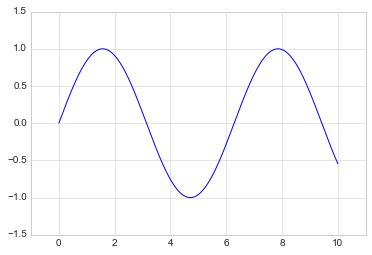

In [19]:
plt.plot(x, np.sin(x))
plt.axis([-1, 11, -1.5, 1.5]);

> The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

當然`plt.axis()`函數不僅能設置範圍，還能像下面代碼一樣將坐標軸壓縮到剛好足夠繪製折線圖像的大小：

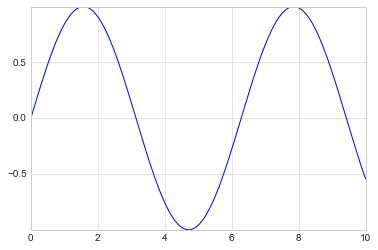

In [20]:
plt.plot(x, np.sin(x))
plt.axis('tight');

> It allows even higher-level specifications, such as ensuring an equal aspect ratio so that on your screen, one unit in ``x`` is equal to one unit in ``y``:

還可以通過設置`'equal'`參數設置`x`軸與`y`軸使用相同的長度單位：

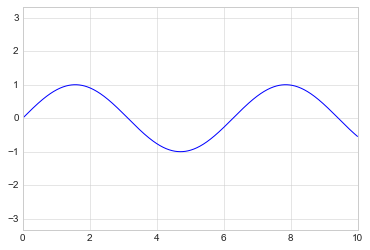

In [21]:
plt.plot(x, np.sin(x))
plt.axis('equal');

## Labeling Plots

## 折線圖標籤

> Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

標題和坐標軸標籤是最簡單的這類標籤，Matplotlib提供了函數用來方便的設置它們：

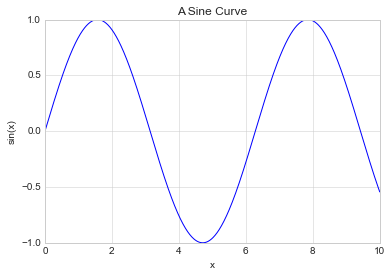

In [22]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

> When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type.
Again, Matplotlib has a built-in way of quickly creating such a legend.
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

當一幅圖中繪製了多條折線時，如果能夠繪製一個線條對應的圖例能讓圖表更加清晰。 Matplotlib也內建了函數來快速創建圖例。估計你也猜到了，通過`plt.legend()`函數可以實現這個需求。雖然有很多種正確的方法來指定圖例，作者認為最簡單的方法是通過在繪製每條線條時指定對應的`label`關鍵字參數來使用這個函數：

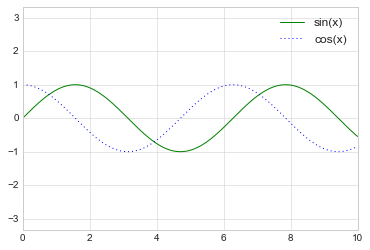

In [23]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

## Aside: Matplotlib Gotchas

## 額外內容：Matplotlib的坑

> While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

雖然大多數的`plt`函數都可以直接轉換為`ax`的方法進行調用（例如`plt.plot()` → `ax.plot()`，`plt.legend()` → `ax.legend()`等），但是並不是所有的命令都能應用這種情況。特別是用於設置極值、標籤和標題的函數都有一定的改變。下表列出了將MATLAB風格的函數轉換為面向對象的方法的區別：

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

> In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

在面向對象接口中，與其逐個調用上面的方法來設置屬性，更常見的使用`ax.set()`方法來一次性設置所有的屬性：

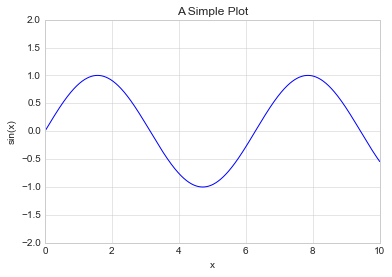

In [24]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

# Visualizing Errors

# 誤差可視化

> For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that I am using some astrophysical observations to estimate the Hubble Constant, the local measurement of the expansion rate of the Universe.
I know that the current literature suggests a value of around 71 (km/s)/Mpc, and I measure a value of 74 (km/s)/Mpc with my method. Are the values consistent? The only correct answer, given this information, is this: there is no way to know.

對於任何的科學測量來說，精確計算誤差與精確報告測量值基本上同等重要，如果不是更加重要的話。例如，設想我正在使用一些天文物理學觀測值來估算哈勃常數，即本地觀測的宇宙膨脹係數。我從一些文獻中知道這個值大概是71 (km/s)/Mpc，而我測量得到的值是74 (km/s)/Mpc,。這兩個值是否一致？在僅給定這些數據的情況下，這個問題的答案是，無法回答。

譯者註：Mpc（百萬秒差距）參見[秒差距](https://zh.wikipedia.org/wiki/%E7%A7%92%E5%B7%AE%E8%B7%9D)

> Suppose I augment this information with reported uncertainties: the current literature suggests a value of around 71 $\pm$ 2.5 (km/s)/Mpc, and my method has measured a value of 74 $\pm$ 5 (km/s)/Mpc. Now are the values consistent? That is a question that can be quantitatively answered.

如果我們將信息增加一些，給出不確定性：最新的文獻表示哈勃常數的值大約是71 $\pm$ 2.5 (km/s)/Mpc，我的測量值是74 $\pm$ 5 (km/s)/Mpc。這兩個值是一致的嗎？這就是一個可以準確回答的問題了。

> In visualization of data and results, showing these errors effectively can make a plot convey much more complete information.

在數據和結果的可視化中，有效地展示這些誤差能使你的圖表涵蓋和提供更加完整的信息。

## Basic Errorbars

## 基礎誤差條

> A basic errorbar can be created with a single Matplotlib function call:

調用一個Matplotlib函數就能創建一個基礎的誤差條：

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

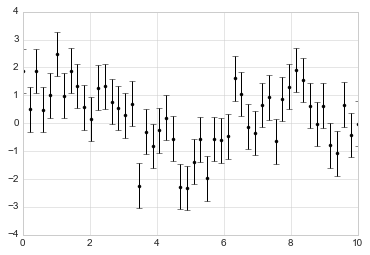

In [26]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

> In addition to these basic options, the ``errorbar`` function has many options to fine-tune the outputs.
Using these additional options you can easily customize the aesthetics of your errorbar plot.
I often find it helpful, especially in crowded plots, to make the errorbars lighter than the points themselves:

除了上面的基本參數，`errorbar`函數還有很多參數可以用來精細調節圖表輸出。使用這些參數你可以很容易的個性化調整誤差條的樣式。作者發現通常將誤差線條顏色調整為淺色會更加清晰，特別是在數據點比較密集的情況下：

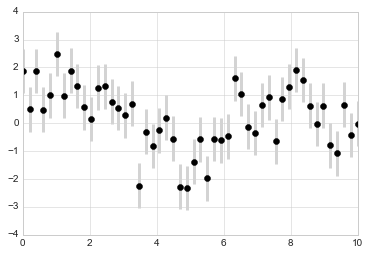

In [27]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

> In addition to these options, you can also specify horizontal errorbars (``xerr``), one-sided errorbars, and many other variants.
For more information on the options available, refer to the docstring of ``plt.errorbar``.

除了上面介紹的參數，你還可以指定水平方向的誤差條（`xerr`），單邊誤差條和其他很多的參數。參閱`plt.errorbar`的幫助文檔獲得更多信息。

## Continuous Errors

## 連續誤差

> In some situations it is desirable to show errorbars on continuous quantities.
Though Matplotlib does not have a built-in convenience routine for this type of application, it's relatively easy to combine primitives like ``plt.plot`` and ``plt.fill_between`` for a useful result.

在某些情況下可能需要對連續值展示誤差條。雖然Matplotlib沒有內建的函數能直接完成這個任務，但是你可以通過簡單將`plt.plot`和`plt.fill_between`函數結合起來達到目標。

> Here we'll perform a simple *Gaussian process regression*, using the Scikit-Learn API (see [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) for details).
This is a method of fitting a very flexible non-parametric function to data with a continuous measure of the uncertainty.
We won't delve into the details of Gaussian process regression at this point, but will focus instead on how you might visualize such a continuous error measurement:

這裡我們會採用簡單的*高斯過程回歸*方法，Scikit-Learn提供了API（參見[Scikit-Learn介紹](05.02-Introducing-Scikit-Learn.ipynb)）。這個方法非常適合在非參數化的函數中獲得連續誤差。我們在這裡不會詳細介紹高斯過程回歸，僅僅聚焦在如何繪製連續誤差本身：

In [28]:
from sklearn.gaussian_process import GaussianProcessRegressor

# 定義模型和一些符合模型的點
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# 計算高斯過程回歸，使其符合 fit 數據點
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * std  # 兩倍sigma ~ 95% 確定區域

> We now have ``xfit``, ``yfit``, and ``dyfit``, which sample the continuous fit to our data.
We could pass these to the ``plt.errorbar`` function as above, but we don't really want to plot 1,000 points with 1,000 errorbars.
Instead, we can use the ``plt.fill_between`` function with a light color to visualize this continuous error:

我們現在有了`xfit`、`yfit`和`dyfit`，作為對我們數據的連續擬合值以及誤差限。當然我們也可以像上面一樣使用`plt.errorbar`繪製誤差條，但是事實上我們不希望在圖標上繪製1000個點的誤差條。於是我們可以使用`plt.fill_between`函數在誤差限區域內填充一道淺色的誤差帶來展示連續誤差：

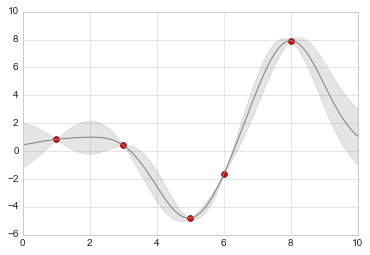

In [29]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10);

> Note what we've done here with the ``fill_between`` function: we pass an x value, then the lower y-bound, then the upper y-bound, and the result is that the area between these regions is filled.

注意上面我們調用`fill_between`函數：我們傳遞了的參數包括x值，y值的低限，然後是y值的高限，結果是圖表中介於低限和高限之間的區域會被填充。

> The resulting figure gives a very intuitive view into what the Gaussian process regression algorithm is doing: in regions near a measured data point, the model is strongly constrained and this is reflected in the small model errors.
In regions far from a measured data point, the model is not strongly constrained, and the model errors increase.

上圖為我們提供了一個非常直觀的高斯過程回歸展示：在觀測點的附近，模型會被限制在一個很小的區域內，反映了這些數據的誤差比較小。在遠離觀測點的區域，模型開始發散，反映了這時的數據誤差比較大。

# Customizing Plot Legends

# 自定義圖標圖例

> Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

圖例可以為可視化賦予實際含義，為不同的圖標元素附上明確說明。我們前面看到了一些簡單的圖例創建例子；本小節中我們來介紹一下在Matplotlib中自定義圖例的位置和進行美化的方法。

> The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

可以使用`plt.legend()`函數來創建最簡單的圖例，這個函數能自動創建任何帶有標籤屬性的圖表元素的圖例：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline

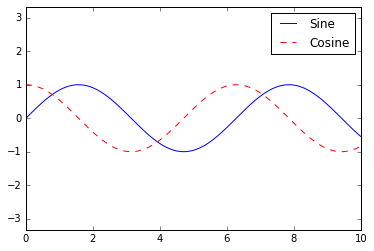

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

> But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

但除此之外還有很多能自定義圖例的方法。例如，我們可以指定圖例位置並且去除邊框：

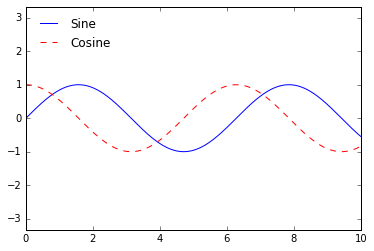

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

> We can use the ``ncol`` command to specify the number of columns in the legend:

我們可以使用`ncol`屬性設置圖例中每行的列數：

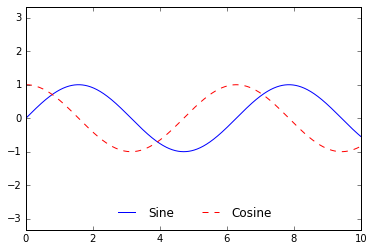

In [4]:
# ncol command to specify the number of columns in the legend:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

> We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame:

還可以使用圓角方框（`fancybox`）或者增加陰影，設置方框的透明度（alpha值）或修改文字的邊距：

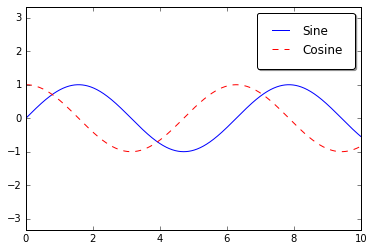

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend

## 選擇設置圖例的元素

> As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

正如我們前面例子所示，繪製的圖例默認包括所有帶標籤的元素。如果這不是想要的效果，我們可以調整哪些元素和標籤會出現在圖例當中，這可以通過設置plot函數或方法返回的對象實現。 `plt.plot`函數能夠同時產生多條折線，然後將這些線條的實例列表返回。將其中的部分實例傳遞到`plt.legend()`函數就能設置哪些線條會出現在圖例中，再通過一個標籤的列表指定圖例的名稱：

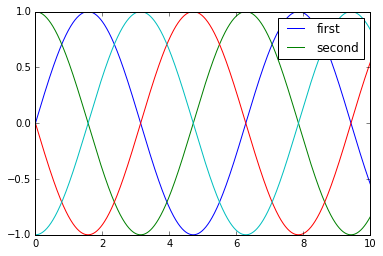

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second']);

> I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

作者更加傾向於使用第一種方式，因為更加清晰。通過將標籤應用在圖表元素上，然後繪製到圖例中：

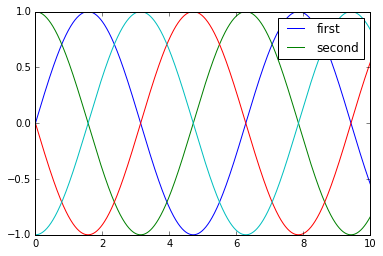

In [7]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Legend for Size of Points

## 散點大小的圖例

> Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

某些情況下默認的圖例不足以滿足特定的可視化需求。例如，你在使用散點的大小來標記數據的某個特徵，然後希望創建一個相應的圖例。下面的例子是加州城市人口的散點圖，我們使用散點的大小表現該城市的面積，散點的顏色來表現城市的人口數量（自然對數值）。我們希望使用一個圖例來指明散點尺寸的比例，同時用一個顏色條來說明人口數量，我們可以通過自定義繪製一些標籤數據來實現尺寸圖例：

譯者註：新版Matplotlib已經取消aspect參數，此處改為使用新的`'scaled'`參數調用axis函數。

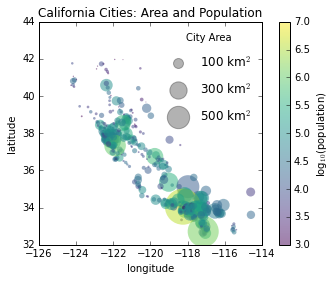

In [8]:
import pandas as pd
cities = pd.read_csv('input/california_cities.csv')

# 提取我們感興趣的數據
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 繪製散點圖，使用尺寸代表面積，顏色代表人口，不帶標籤
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis('scaled')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面我們創建圖例：
# 使用空列表繪製圖例中的散點，使用不同面積和標籤，帶透明度
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## Multiple Legends

## 多重圖例

> Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

有時候我們可能需要在同一個圖表維度中設計多個圖例。不幸的是，Matplotlib並沒有提供很簡單的方式實現：通過標準的`legend`接口，只能在整張圖表上創建一個圖例。如果你試圖使用`plt.legend()`或`ax.legend()`創建第二個圖例，那麼第二條語句創建的圖例會覆蓋第一條語句創建的。我們只能通過從底層開始來創建一個新的圖例artist這種方法來解決這個問題，然後使用`ax.add_artist()`的底層方法手動將第二個作者加到圖表上：

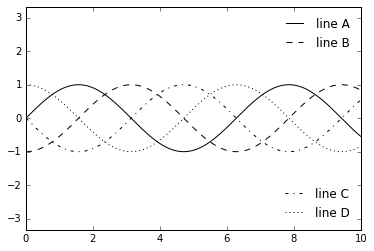

In [9]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# 指定第一個圖例的線條和標籤
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# 手動創建第二個圖例，並將作者添加到圖表中
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

# Customizing Colorbars

# 個性化顏色條

> Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.
Because the book is printed in black-and-white, this section has an accompanying online supplement where you can view the figures in full color (https://github.com/jakevdp/PythonDataScienceHandbook).
We'll start by setting up the notebook for plotting and importing the functions we will use:

圖例可以將離散的點標示為離散的標籤。對於建立在不同顏色之上的連續的值（點線面）來說，標註了的顏色條是非常方便的工具。 Matplotlib的顏色條是獨立於圖表之外的一個類似於比色卡的圖形，用來展示圖表中不同顏色的數值含義。因為本書是使用黑白打印的，本節內容中的所有帶色彩的圖都可以在(https://github.com/wangyingsm/Python-Data-Science-Handbook)中找到。我們還是首先導入本節需要的包和模塊：

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

> As we have seen several times throughout this section, the simplest colorbar can be created with the ``plt.colorbar`` function:

通過`plt.colorbar`函數可以創建最簡單的顏色條：

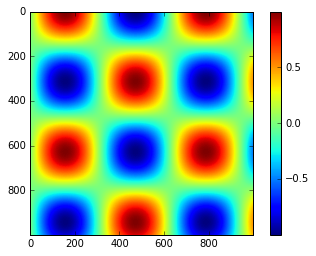

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Customizing Colorbars

## 自定義顏色條

> The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

顏色條可以通過`cmap`參數指定使用的色譜系統（或叫色圖）：

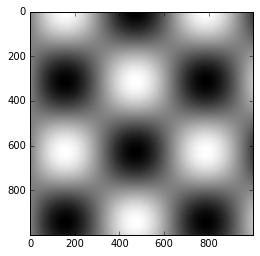

In [4]:
plt.imshow(I, cmap='gray');

### Choosing the Colormap

### 選擇色圖

> A full treatment of color choice within visualization is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
Matplotlib's online documentation also has an [interesting discussion](http://Matplotlib.org/1.4.1/users/colormaps.html) of colormap choice.

在可視化方案中選擇顏色完整的介紹說明超出了本書的範圍，如果你對這個課題和相關內容有興趣，可以參考文章["繪製更漂亮圖表的10個簡單規則"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)。 Matplotlib的在線文檔也有一章關於色圖選擇的[有趣討論](http://Matplotlib.org/1.4.1/users/colormaps.html)。通常來說，你應該注意以下三種不同類型的色圖：

- *序列色圖*：這類型的色譜只包括一個連續序列的色系（例如`binary`或`viridis`）。
- *分化色圖*：這類型的色譜包括兩種獨立的色系，這兩種顏色有著非常大的對比度（例如`RdBu`或`PuOr`）。
- *定性色圖*：這類型的色圖混合了非特定連續序列的顏色（例如`rainbow`或`jet`）。

> The ``jet`` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

`jet`色圖，在Matplotlib 2.0版本之前都是默認的色圖，是定性色圖的一個例子。 `jet`作為默認色圖的位置其實有點尷尬，因為定性圖通常都不是對定量數據進行展示的好選擇。原因是定性圖通常都不能在範圍增加時提供亮度的均勻增長。

> We can see this by converting the ``jet`` colorbar into black and white:

我們可以通過將`jet`顏色條轉換為黑白來看到這點：

In [5]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """返回給定色圖的灰度版本"""
    cmap = plt.cm.get_cmap(cmap) # 使用名稱獲取色圖對象
    colors = cmap(np.arange(cmap.N)) # 將色圖對象轉為RGBA矩陣，形狀為N×4
    
    # 將RGBA顏色轉換為灰度
    # 參考 http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114] # RGB三色的權重值
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight)) # RGB平方值和權重的點積開平方根
    colors[:, :3] = luminance[:, np.newaxis] # 得到灰度值矩陣
    # 返回相應的灰度值色圖
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """將色圖對應的灰度版本繪製出來"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

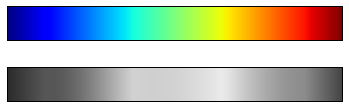

In [6]:
view_colormap('jet')

> Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as ``viridis`` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.
Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

注意一下上面的灰度圖中亮條紋的位置。即使在上述彩色圖中，也出現了這種不規則的亮條紋，這會導致眼睛被區域中亮條紋所吸引，這很可能造成閱讀者被不重要的數據集部分乾擾了。更好的選擇是使用類似`viridis`這樣的色圖（Matplotlib 2.0後默認色圖），它們被設計為有著均勻的亮度變化。因此它們無論是在彩色圖中還是在灰度圖中都有著同樣的亮度變化：

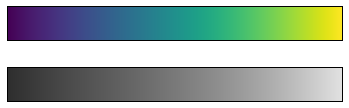

In [7]:
view_colormap('viridis')

> If you favor rainbow schemes, another good option for continuous data is the ``cubehelix`` colormap:

如果你更喜歡彩虹方案，另一個好的選擇是使用`cubehelix`色圖：

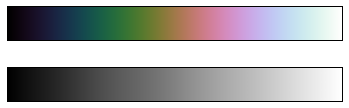

In [8]:
view_colormap('cubehelix')

> For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as ``RdBu`` (*Red-Blue*) can be useful. However, as you can see in the following figure, it's important to note that the positive-negative information will be lost upon translation to grayscale!

對於其他的情況，例如某種正負分佈的數據集，雙色顏色條如`RdBu`（*Red-Blue*）會很常用。然而正如你從下面例子看到的，如果將雙色顏色條轉化為灰度的話，正負或兩級的信息就會丟失：

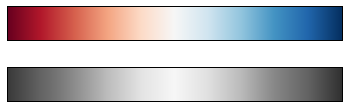

In [9]:
view_colormap('RdBu')

> There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the ``plt.cm`` submodule. For a more principled approach to colors in Python, you can refer to the tools and documentation within the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

Matplotlib中有大量可用的色圖；要看到它們的列表，你可以使用IPython來探索`plt.cm`模塊。要在Python中更加正規的使用顏色，你可以查看Seaborn庫的工具和文檔（參見[使用Seaborn進行可視化](04.14-Visualization-With-Seaborn.ipynb)）。

### Color limits and extensions

### 顏色限制和擴展

> Matplotlib allows for a large range of colorbar customization.
The colorbar itself is simply an instance of ``plt.Axes``, so all of the axes and tick formatting tricks we've learned are applicable.
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the ``extend`` property.
This might come in handy, for example, if displaying an image that is subject to noise:

Matplotlib允許你對顏色條進行大量的自定義。顏色條本身就是一個`plt.Axes`對象，因此所有軸和刻度定制的技巧都可以應用在上面。顏色條也有著一些有趣的自定義行為：例如，我們可以縮小顏色的範圍並且通過設置`extend`參數將超出範圍之外的數值展示為頂部和底部的三角箭頭形狀。這對於展示一些受到噪聲干擾的數據時非常方便：

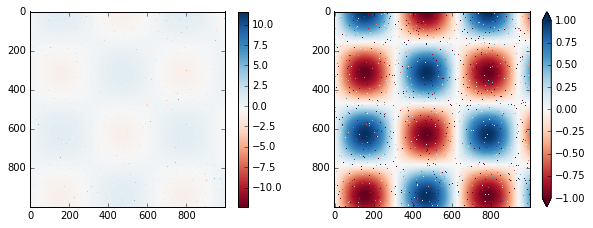

In [10]:
# 在I数组中人为生成不超过1%的噪声
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))
# 不考虑去除噪声时的颜色分布
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()
# 设置去除噪声时的颜色分布
plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

> Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

注意到在左邊的圖表中，默認的顏色閾值是包括了噪聲的，因此整體的條紋形狀都被噪聲數據沖刷淡化了。而右邊的圖表，我們手動設置了顏色的閾值，並在繪製顏色條是加上了`extend`參數來表示超出閾值的數據。對於我們的數據來說，右圖比左圖要好的多。

### Discrete Color Bars

### 離散顏色條

> Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

色圖默認是連續的，但是在某些情況下你可能需要展示離散值。最簡單的方法是使用`plt.cm.get_cmap()`函數，在傳遞某個色圖名稱的同時，還額外傳遞一個顏色分桶的數量值參數給該函數：

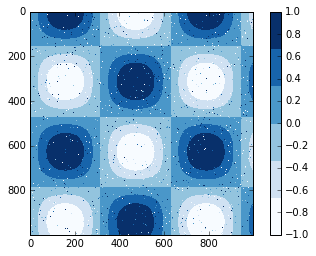

In [11]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

## Example: Handwritten Digits

## 例子：手寫數字

> For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data.
This data is included in Scikit-Learn, and consists of nearly 2,000 $8 \times 8$ thumbnails showing various hand-written digits.

最後我們來看一個很有實用價值的例子，讓我們實現對一些手寫數字圖像數據的可視化分析。這個數據包含在Sciki-Learn中，以供包含有將近2,000張 $8 \times 8$ 大小的不同筆蹟的手寫數字縮略圖。

> For now, let's start by downloading the digits data and visualizing several of the example images with ``plt.imshow()``:

首先，我們下載這個數據集，然後使用`plt.imshow()`將其中部分數據展示出來：

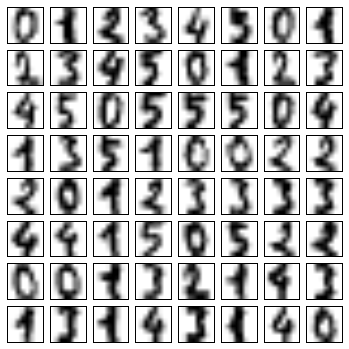

In [6]:
# 讀取數字0-5的手寫圖像，然後使用Matplotlib展示頭64張縮略圖
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

> Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.
But visualizing relationships in such high-dimensional spaces can be extremely difficult.
One way to approach this is to use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.
Dimensionality reduction is an example of unsupervised machine learning, and we will discuss it in more detail in [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb).

因為每個數字都是使用64個像素點渲染出來的，我們可以認為每個數字是一個64維空間中的點：每個維度代表這其中一個像素的灰度值。但是要在圖表中將這麼高維度空間的聯繫可視化出來是非常困難的。有一種做法是使用*降維*技術，比方說使用流形學習來減少數據的維度然而不會丟失數據中有效的信息。降維技術是無監督機器學習的一個例子，我們會在[什麼是機器學習？ ](05.01-What-Is-Machine-Learning.ipynb)中更加詳細的介紹它們。

In [7]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


> We'll use our discrete colormap to view the results, setting the ``ticks`` and ``clim`` to improve the aesthetics of the resulting colorbar:

我們使用離散顏色條來展示結果，設置`ticks`和`clim`來進一步美化結果的顏色條：

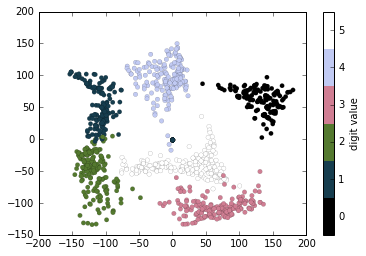

In [14]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

> The projection also gives us some interesting insights on the relationships within the dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused.
This observation agrees with our intuition, because 5 and 3 look much more similar than do 0 and 1.

我們從流形學習中的映射中可以觀察到一些有趣現象：例如，圖表中5和3有一些重疊的部分，這表示一些手寫體中5和3是比較難以辨別的，因此對於自動識別算法來說這是比較容易混淆的部分。而0和1，它們在圖表中距離很遠，這表示兩者比較容易辨別，不太可能造成混淆。這個圖表分析與我們的直覺一致，因為5和3顯然比0和1看起來更加接近。

<!--NAVIGATION-->
< [更多资源](03.13-Further-Resources.ipynb) | [目录](Index.ipynb) | [简单的折线图](04.01-Simple-Line-Plots.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
